### Oversmapling & Undersampling using sklearn package

#### What is Imbalance Data set?
Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

#### What is Oversampling & Undersampling:

One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.

- Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
- Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
- Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

#### Reference Links:
- https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
- https://imbalanced-learn.readthedocs.io/en/stable/
- https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html



- Synthetic Minority Oversampling Technique (SMOTE)
- ADASYN (Adaptive Synthetic Sampling)
- Under-sampling: Tomek links
- NearMiss
- Change the algorithm `tree ensembles (Random Forests, Gradient Boosted Trees`
- Change the performance metric `Recall, Precision etc..`



    

In [1]:
import os
import pandas as pd
import numpy as np
# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
os.chdir(r'C:\Users\Karan\OneDrive\Desktop\New folder (2)\ML\Imbalance and Bayes')

In [3]:
data = pd.read_csv('HR_comma_sep.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.46,0.54,2,158,3,0,1,0,support,medium
1,0.09,0.97,7,268,4,0,1,0,support,medium
2,0.89,1.00,4,237,5,0,1,0,support,medium
3,0.82,1.00,4,273,6,0,1,0,support,medium
4,0.11,0.89,6,309,4,0,1,0,support,medium


In [5]:
# from sklearn.utils import resample

In [6]:
data.left.value_counts()

0    11428
1     2535
Name: left, dtype: int64

In [7]:
2535/ ( 2535+11428)

0.18155124256964836

## Running Model on Imbalance class data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


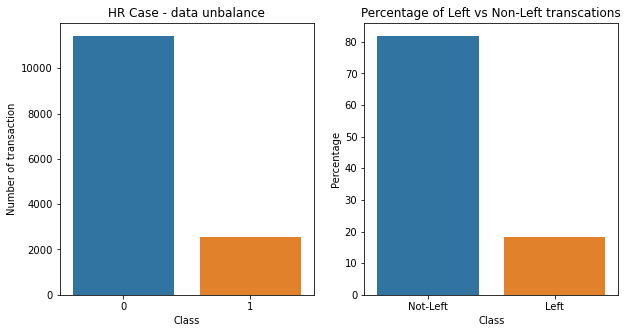

In [8]:

classes=data['left'].value_counts()
normal_share=round(classes[0]/data['left'].count()*100,2)
fraud_share=round(classes[1]/data['left'].count()*100, 2)
normal_share, fraud_share

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data["left"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("HR Case - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Not-Left', 'Left'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Left vs Non-Left transcations')

plt.show()

In [9]:
data=pd.get_dummies(data)

In [10]:

X=data.drop(columns=["left"])
y=data.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [11]:
scaler = StandardScaler()
# test ~ only transform

# Scaling the train data
X_train1 = scaler.fit_transform(X_train)

X_trains=pd.DataFrame(X_train1, columns=X_train.columns)

# Transforming the test data
X_test1 = scaler.transform(X_test)
X_tests=pd.DataFrame(X_test1, columns=X_test.columns)

In [16]:
X_trains.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,1.219198,-0.745857,0.174051,-0.209890,1.026291,-0.418830,-0.151925,-0.299061,-0.240135,-0.227354,-0.229091,-0.210281,-0.249179,-0.255799,-0.614534,-0.418239,2.140609,3.242756,-0.957913,-0.876815
1,0.971131,0.673683,0.174051,0.157831,-0.313862,2.387605,-0.151925,3.343804,-0.240135,-0.227354,-0.229091,-0.210281,-0.249179,-0.255799,-0.614534,-0.418239,-0.467157,-0.308380,1.043937,-0.876815
2,-0.517273,-1.100742,-0.674553,-1.190479,-0.313862,2.387605,-0.151925,-0.299061,-0.240135,-0.227354,-0.229091,-0.210281,-0.249179,3.909322,-0.614534,-0.418239,-0.467157,-0.308380,-0.957913,1.140492
3,1.467266,0.141356,0.174051,-1.251766,-0.313862,-0.418830,-0.151925,-0.299061,-0.240135,-0.227354,4.365073,-0.210281,-0.249179,-0.255799,-0.614534,-0.418239,-0.467157,-0.308380,-0.957913,1.140492
4,1.136509,-1.100742,-0.674553,-0.679755,-0.313862,-0.418830,-0.151925,-0.299061,-0.240135,-0.227354,4.365073,-0.210281,-0.249179,-0.255799,-0.614534,-0.418239,-0.467157,-0.308380,1.043937,-0.876815


In [12]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
def new_ratio(y):
    zero=len(y)-y.sum()
    one=y.sum()
    rro=round(((one/len(y))*100),2)
    rrz=round(((zero/len(y))*100),2)
    print(f"Class ratio 1 ({one}) :0 ({zero}) is {rro}% : {rrz}%")

In [17]:
# # Create the parameter grid 
# param_grid = {
#     'max_depth': range(5, 15, 5),
#     'min_samples_leaf': range(50, 150, 50),
#     'min_samples_split': range(50, 150, 50),
# }


# # Instantiate the grid search model
# dtree = DecisionTreeClassifier()

# grid_search = GridSearchCV(estimator = dtree, 
#                            param_grid = param_grid, 
#                            scoring= 'roc_auc',
#                            cv = 3, 
#                            n_jobs=-1,
#                            verbose = 1)

# # Fit the grid search to the data
# grid_search.fit(X_trains,y_train)

In [15]:
# cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results

In [18]:
# # Printing the optimal score and hyperparameters
# print("Best roc auc score : ", grid_search.best_score_)
# print(grid_search.best_estimator_)

In [13]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_imb_model.fit(X_trains, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [14]:
y_train_pred = dt_imb_model.predict(X_trains)
display_scores(y_train, y_train_pred)

F1 Score: 92.41%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      9156
           1       0.96      0.89      0.92      2014

    accuracy                           0.97     11170
   macro avg       0.97      0.94      0.95     11170
weighted avg       0.97      0.97      0.97     11170



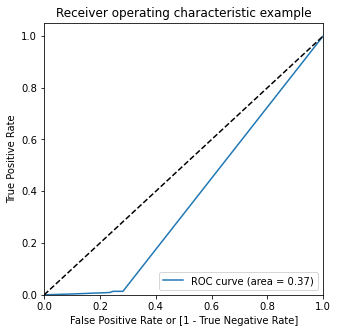

In [15]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [16]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 0.77%
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      2272
           1       0.01      0.01      0.01       521

    accuracy                           0.63      2793
   macro avg       0.39      0.39      0.39      2793
weighted avg       0.63      0.63      0.63      2793



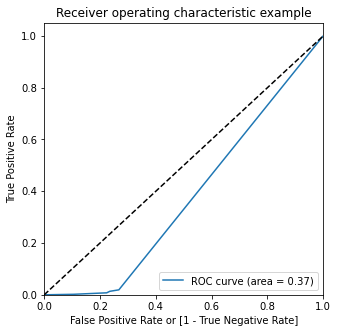

In [17]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## OverSampling & UnderSampling

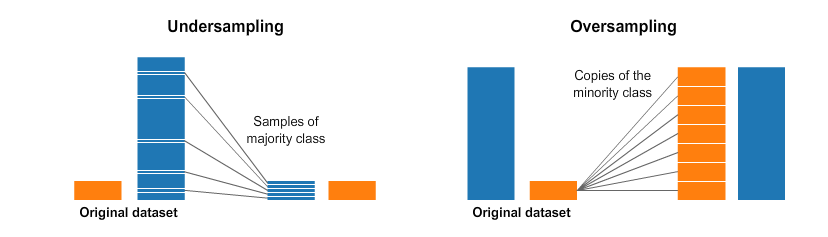

In [24]:
# help(RandomOverSampler)

In [21]:
pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [24]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=.8)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_trains, y_train)

In [25]:
new_ratio(y_train)

Class ratio 1 (2014) :0 (9156) is 18.03% : 81.97%


In [26]:
new_ratio(y_over)

Class ratio 1 (7324) :0 (9156) is 44.44% : 55.56%


In [37]:
9134*.8

7307.200000000001

In [22]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 9156, 1: 2014})
New class distribution:- Counter({0: 9156, 1: 7324})


In [23]:
# # Create the parameter grid 
# param_grid = {
#     'max_depth': range(5, 15, 5),
#     'min_samples_leaf': range(50, 150, 50),
#     'min_samples_split': range(50, 150, 50),
# }


# # Instantiate the grid search model
# dtree = DecisionTreeClassifier()

# grid_search = GridSearchCV(estimator = dtree, 
#                            param_grid = param_grid, 
#                            scoring= 'roc_auc',
#                            cv = 3, 
#                            n_jobs=-1,
#                            verbose = 1)

# # Fit the grid search to the data
# grid_search.fit(X_over,y_over)

In [40]:
# # Printing the optimal roc score and hyperparameters
# print("Best roc auc score : ", grid_search.best_score_)
# print(grid_search.best_estimator_)

Best roc auc score :  0.9880400380211958
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [24]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [25]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 95.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9156
           1       0.99      0.92      0.95      7324

    accuracy                           0.96     16480
   macro avg       0.96      0.95      0.96     16480
weighted avg       0.96      0.96      0.96     16480



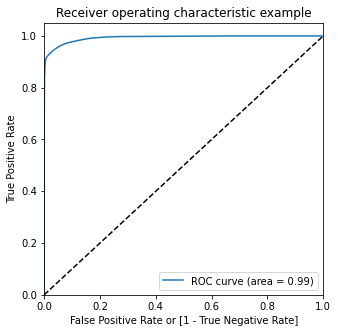

In [26]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [27]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_tests)
display_scores(y_test, y_test_pred)

F1 Score: 93.66%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2272
           1       0.95      0.92      0.94       521

    accuracy                           0.98      2793
   macro avg       0.97      0.96      0.96      2793
weighted avg       0.98      0.98      0.98      2793



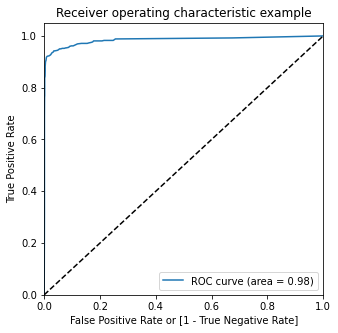

In [28]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_tests)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [22]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


In [23]:
from imblearn.under_sampling import RandomUnderSampler

# define oversampling strategy
# undersample = RandomUnderSampler( sampling_strategy={0: 5000, 1: 2800})
undersample = RandomUnderSampler(  sampling_strategy=.6)
# fit and apply the transform
X_under, y_under= undersample.fit_resample(X_trains, y_train)

In [30]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_under))

Before sampling class distribution:- Counter({0: 9156, 1: 2014})
New class distribution:- Counter({0: 3356, 1: 2014})


In [31]:
new_ratio(y_under)

Class ratio 1 (2014) :0 (3356) is 37.5% : 62.5%


In [32]:
# Model with optimal hyperparameters
dt_under_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_under_model.fit(X_under, y_under)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [33]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_under)
display_scores(y_under, y_train_pred)

F1 Score: 94.97%
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3356
           1       0.99      0.91      0.95      2014

    accuracy                           0.96      5370
   macro avg       0.97      0.95      0.96      5370
weighted avg       0.96      0.96      0.96      5370



In [34]:
# Evaluating model on the test data
y_test_pred = dt_under_model.predict(X_tests)
display_scores(y_test, y_test_pred)

F1 Score: 91.98%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2272
           1       0.91      0.93      0.92       521

    accuracy                           0.97      2793
   macro avg       0.95      0.95      0.95      2793
weighted avg       0.97      0.97      0.97      2793



## Synthetic Minority Oversampling Technique (SMOTE)

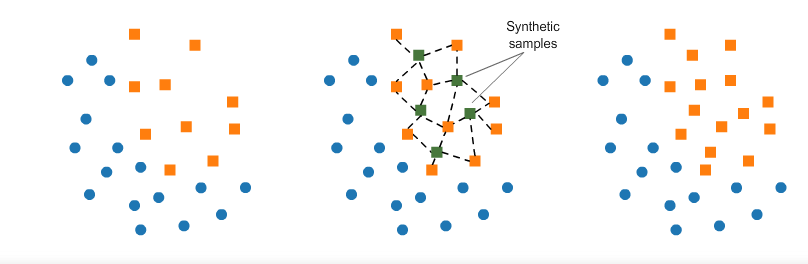

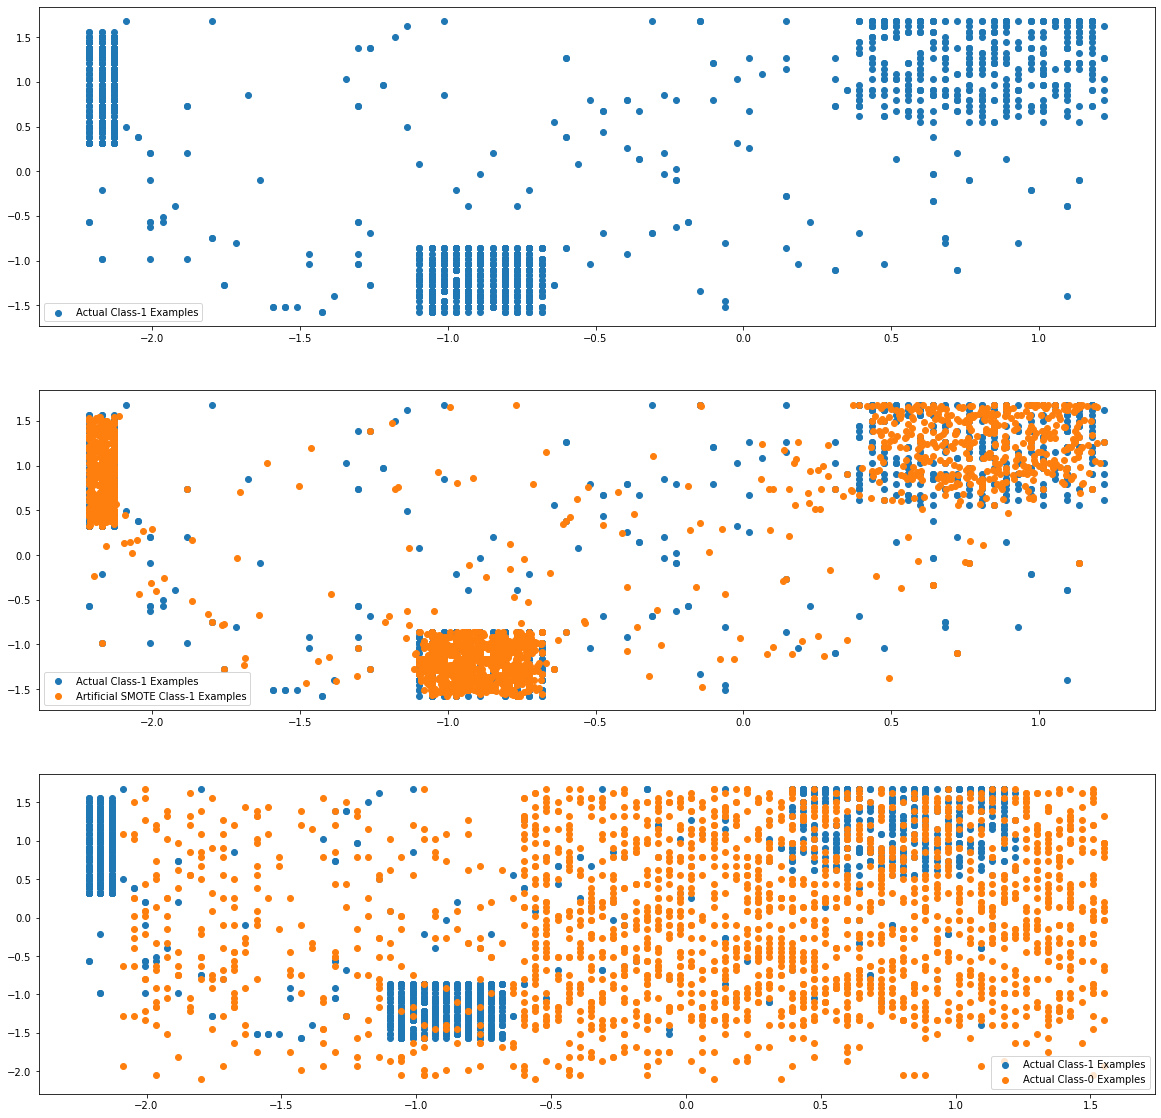

In [35]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_trains, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_trains.shape[0]:]

X_train_1 = X_trains.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_trains.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [36]:
# # Create the parameter grid 
# param_grid = {
#     'max_depth': range(5, 15, 5),
#     'min_samples_leaf': range(50, 150, 50),
#     'min_samples_split': range(50, 150, 50),
# }


# # Instantiate the grid search model
# dtree = DecisionTreeClassifier()

# grid_search = GridSearchCV(estimator = dtree, 
#                            param_grid = param_grid, 
#                            scoring= 'roc_auc',
#                            cv = 3, 
#                            n_jobs=-1,
#                            verbose = 1)

# # Fit the grid search to the data
# grid_search.fit(X_train_smote,y_train_smote)

In [37]:
# # Printing the optimal roc score and hyperparameters
# print("Best roc auc score : ", grid_search.best_score_)
# print(grid_search.best_estimator_)

In [38]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [39]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 96.39%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      9156
           1       0.99      0.94      0.96      9156

    accuracy                           0.96     18312
   macro avg       0.97      0.96      0.96     18312
weighted avg       0.97      0.96      0.96     18312



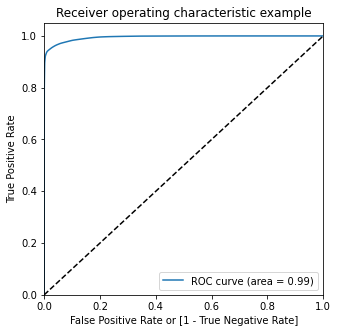

In [40]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [41]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_tests)
display_scores(y_test, y_pred)

F1 Score: 92.68%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2272
           1       0.93      0.92      0.93       521

    accuracy                           0.97      2793
   macro avg       0.96      0.95      0.96      2793
weighted avg       0.97      0.97      0.97      2793



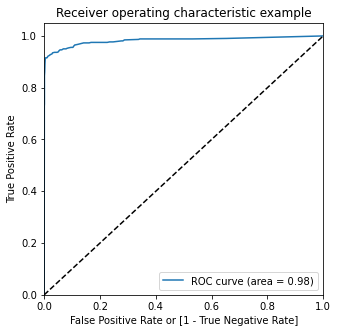

In [42]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_tests)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

## ADASYN (Adaptive Synthetic Sampling)

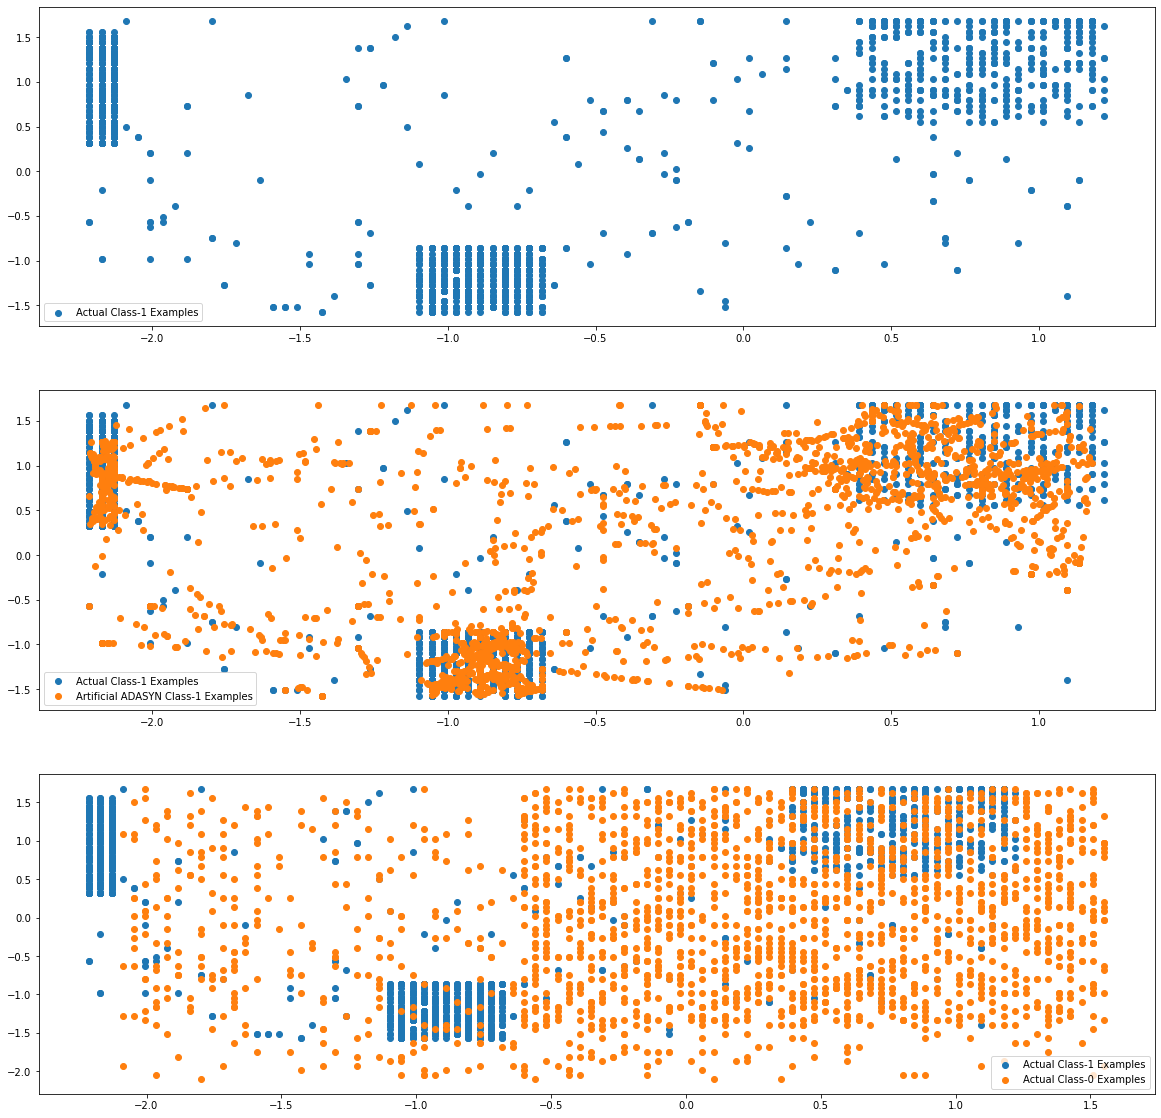

In [43]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_trains, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_trains.shape[0]:]

X_train_1 = X_trains.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_trains.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [44]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [45]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9733922145041038
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [46]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [47]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 93.88%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      9156
           1       0.94      0.94      0.94      9153

    accuracy                           0.94     18309
   macro avg       0.94      0.94      0.94     18309
weighted avg       0.94      0.94      0.94     18309



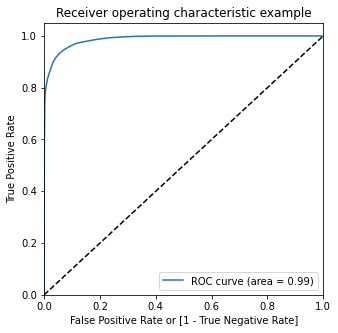

In [48]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [49]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_tests)
display_scores(y_test, y_pred)

F1 Score: 85.24%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2272
           1       0.78      0.94      0.85       521

    accuracy                           0.94      2793
   macro avg       0.88      0.94      0.91      2793
weighted avg       0.95      0.94      0.94      2793



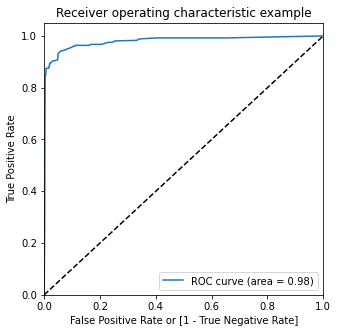

In [50]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_tests)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)